# Car Evaluator Predictor

## About Dataset

Car Acceptability Classification Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). 

This is a multiclass classification dataset using which we can evaluate the different classes of acceptability of a car depending on the different parameters.

## Source

This dataset is available on Kaggle in the following link:

> https://www.kaggle.com/datasets/subhajeetdas/car-acceptability-classification-dataset/data

## Data Dictionary

* **Buying_Price**: Buying price of the car. Categorical Data(v-high, high, med, low)
* **Maintenance_Price**: Price of the maintenance of car. Categorical Data (v-high, high, med, low)
* **No_of_Doors**: Number of doors in the car. Categorical Data  (2, 3, 4, 5-more)
* **Person_Capacity**: Capacity in terms of persons to carry by the car. Categorical Data (2, 4, more)
* **Size_of_Luggage**: The size of luggage boot in the car. Categorical Data (small, med, big)
* **Safety**: Estimated safety of the car. Categorical Data  (low, med, high)
* **Car_Acceptability**: Car acceptability is the target. (unacc: unacceptible, acc: acceptible, good: good, v-good: very good)

## Problem Statement

1. **Exploratory Data Analysis(EDA)**: The objective of EDA is to analyze the dataset and uncover the patterns and relationships that might influence acceptability of the car.
2. **Preprocessing and Cleaning**: Clean the data by handling or removing missing values, outliers, duplicate rows and unnecessary features.

### Load Necessary Libraries

In [1]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Preporcessing Libraries
import ppscore as pps
from sklearn.ensemble import IsolationForest

### Settings

In [3]:
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")

### Load Dataset

In [4]:
df = pd.read_csv("car.csv")

### General Information About Dataset

In [5]:
# Fetch 1st 5 rows to get an idea about the values in each feature including target
df.head()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
# Data Description
print("="* 60)
print("DATA DESCRIPTION")
print("=" * 60)
print(f"Number of observartions: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")

DATA DESCRIPTION
Number of observartions: 1728
Number of features: 7


In [9]:
print("=" * 60)
print("FEATURE DESCRIPTION")
print("=" * 60)
print(df.dtypes)
print("-" * 60)
print("All features are categorical features.")

FEATURE DESCRIPTION
Buying_Price         object
Maintenance_Price    object
No_of_Doors          object
Person_Capacity      object
Size_of_Luggage      object
Safety               object
Car_Acceptability    object
dtype: object
------------------------------------------------------------
All features are categorical features.


In [11]:
# Check number of duplicate rows present in the dataset
print("=" * 60)
print("DUPLICATE ROW DETECTION")
print("=" * 60)
print(f"Number of duplicate rows: {df.duplicated().sum()}")

DUPLICATE ROW DETECTION
Number of duplicate rows: 0


In [13]:
# Check presence of missing values in any feature
print("=" * 60)
print("MISSING VALUE DETECTION")
print("=" * 60)
if df.isnull().sum().sum() > 0:
    print(df.isnull().sum())
else:
    print("There is no missing value present in any feature in the dataset.")

MISSING VALUE DETECTION
There is no missing value present in any feature in the dataset.


### Univariate Analysis

Analysis of each feature independently to check the proportion of observations of each of them.

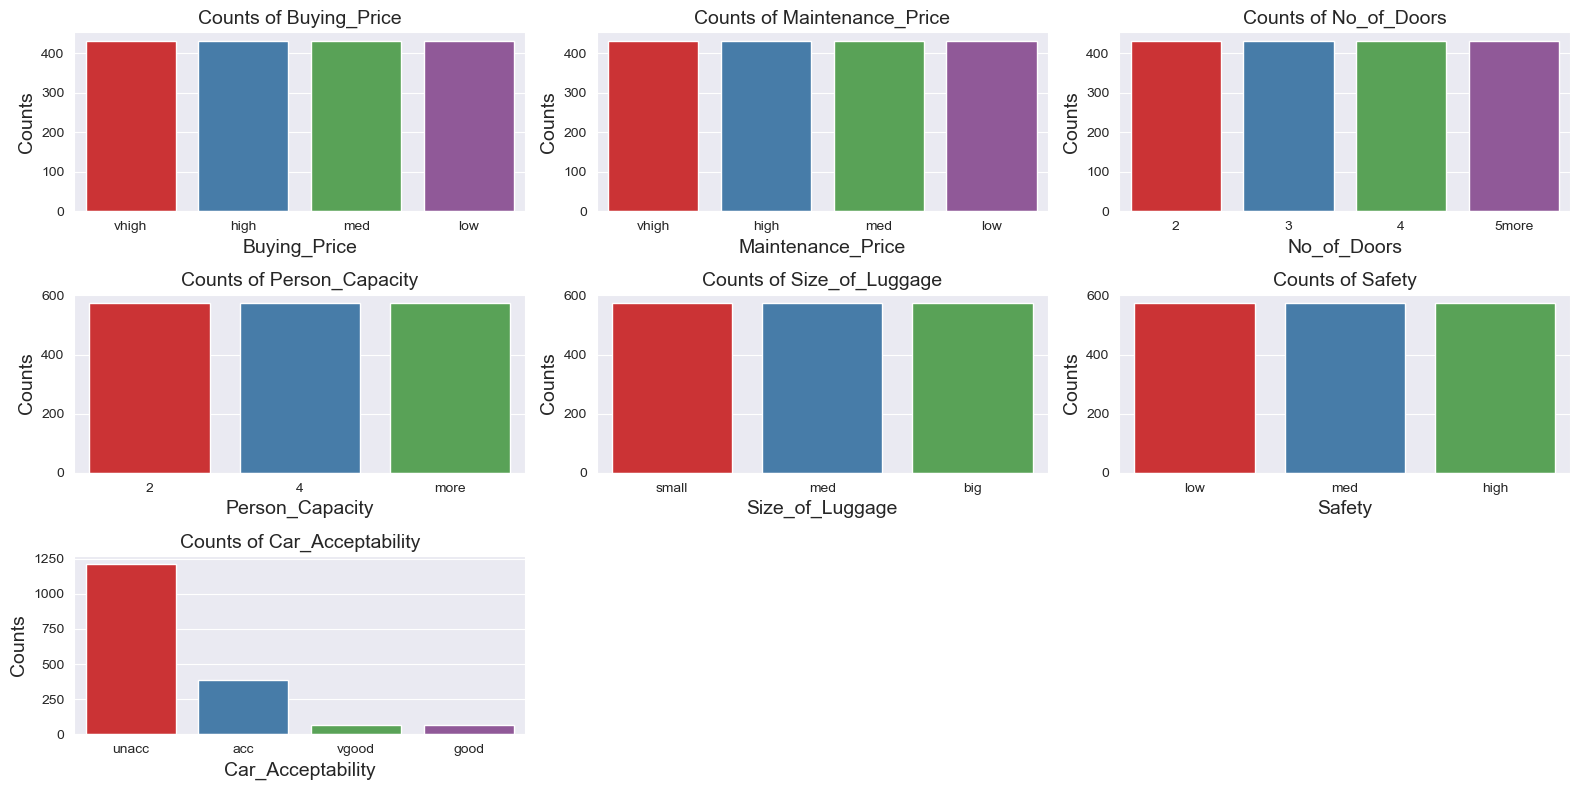

In [20]:
# Visualize the features using count plot so that we can understand the proportion of each category of the features.

fig, axes = plt.subplots(nrows= 3, ncols= 3, figsize=(16,8))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.countplot(data= df, x = col, hue= col, palette= "Set1", ax= axes[i])
    axes[i].set_title(f"Counts of {col}", fontsize=14)
    axes[i].set_xlabel(f"{col}", fontsize=14)
    axes[i].set_ylabel("Counts", fontsize= 14)
plt.tight_layout()
axes[-2].axis("off")
axes[-1].axis("off")
plt.show()

### Key Findings

* From Count Plot Analysis of features it is found that **equal** number of observations are present for the each category of all categorical features.
* From Count Plot Analysis of **Car_Acceptability** it is found that **high** number of **unacceptable** observations are present compared to others. So we can say it is an **Imbalanced** dataset. 

### Correlation Analysis

In [23]:
# Find Predictive Power Score(PPS) to check non-linear correlation among all the features.
# We use the method as all the features are categorical

pps_matrix = pps.matrix(df)
# Print the correlation having PPS is more than 0.4
pps_matrix[(pps_matrix["x"]!= pps_matrix["y"]) & (pps_matrix["ppscore"] > 0.1)]

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
45,Car_Acceptability,Person_Capacity,0.122321,classification,True,weighted F1,0.321759,0.404723,DecisionTreeClassifier()
47,Car_Acceptability,Safety,0.151766,classification,True,weighted F1,0.328125,0.430093,DecisionTreeClassifier()


### Key Findings

* There is very week correlation present for Car_Acceptability with Person_Capacity and Safety.